In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import pathlib
from utils import *

# Process results

In [3]:
data_path = pathlib.Path('/home/users/bjornmik/datasets/sweep_15/')

In [4]:
errors = compute_errors(data_path)

  0%|          | 0/8 [00:00<?, ?it/s]

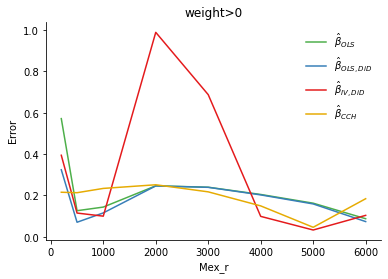

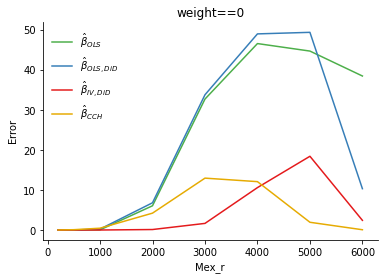

In [8]:
plot_errors(errors, 'mex_r', keys=['beta_ols', 'beta_ols_did', 'beta_iv_did', 'naive_cch'])

In [6]:
error_trials = compute_error_trials(data_path)

  0%|          | 0/800 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
errors = compute_error_confidence(errors, error_trials)

In [ ]:
errors['positives'][['n_stim', 'error_ols_iv_did_pval', 'error_ols_iv_did_statistic']]

In [ ]:
plot_error_difference(errors, 'mex_r')

# Convergence

In [ ]:
error_convergence = compute_error_convergence(data_path)

In [ ]:
samples = compute_all_samples(data_path)

In [ ]:
index = int(errors['weight>0'].query('mex_r==3000').index.values)
index

In [ ]:
plot_error_convergence(error_convergence, index, ['error_beta_ols_did','error_beta_iv_did'])

# Regression

In [ ]:
plot_regression(samples[index].query('weight>0'), ['beta_ols_did','beta_iv_did'], rectify=True)

In [ ]:
plot_false_positives(samples[index], ['beta_ols_did', 'beta_iv_did'], rectify=True)

# Classification

In [ ]:
keys = ['beta_ols_did', 'beta_iv_did', 'beta_brew_did']

In [ ]:
auroc = []
for index, df in samples.items():
#     df = rectify_keys(df, keys)
    ser = df.iloc[0]
    for key in keys:
        a = roc_auc_score(df, key)
        score = {
            'mex_r': ser.mex_r,
            'group': key,
            'auroc': a
        }
        auroc.append(score)
auroc = pd.DataFrame(auroc)

In [ ]:
fig, ax = plt.subplots(1,1)
sns.lineplot(
    data=auroc,#.sort_values('n_neurons'),
    x="mex_r", y='auroc',
    hue="group",
    ax=ax
)
ax.set_ylabel('Score')
ax.set_title(key)
plt.tight_layout()

# Convergence trials

In [ ]:
error_convergence_trials = compute_error_convergence_trials(data_path)

In [ ]:
fig, axs = plt.subplots(2, 8, sharex=True, sharey='row', figsize=(8,2.5), dpi=150)
for i, (mex_r, df) in enumerate(errors['weight>0'].groupby('mex_r')):
    index = int(df.index.values)
    plot_error_convergence_trials( 
        error_convergence_trials, 
        index, 
        keys=['error_beta_ols_did','error_beta_iv_did','error_beta_brew_did'], 
        axs=axs.T[i], legend=i==4, xlabels=(False,True), ylabels=[i==0]*2)
    axs[0,i].set_title(f'{mex_r:.0f}')